<a href="https://colab.research.google.com/github/Siri319/Uber_Data/blob/main/uber_data_cleaned_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name - Uber Supply Demand Gap Analysis

Project Summary -

For this project, Excel, SQL, and Python (Pandas) were used to analyze Uber request data in order to find trends in demand, cancellations, and service availability.  In order to rectify date formats, handle null values, and extract valuable time-based features, the data was first cleaned using Excel Power Query.  Insights like hourly request patterns, status-wise distribution, and failure hotspots across pickup sites were then extracted using SQL.

 Peak demand happens around morning and evening rush hours, according to exploratory data analysis using Pandas and Seaborn.  Airport pickups frequently displayed "No Cars Available" in the late hours of the night, while city pickups frequently experienced cancellations, particularly in the morning.  These results point to a mismatch between the supply and demand for drivers, highlighting the need for more effective resource allocation during peak hours.

Github Link - https://github.com/Siri319/Uber_Data

### Problem Statement -
Especially during peak hours, Uber has been dealing with service inefficiencies characterized by a large volume of canceled requests and "No Cars Available" problems.  These issues have an impact on customer satisfaction and suggest that demand and driver availability may not be balanced.  This project's goal is to examine Uber request data in order to identify trends in trip statuses, user demand, and pickup point performance.  The analysis attempts to offer practical insights that can assist Uber in optimizing driver allocation and improving overall operational efficiency by analyzing the most likely times and locations for service breakdowns.

### Business Objectives -
* Determine the hours of greatest demand to best schedule drivers
* Examine the performance of pickup points (city vs. airport) to balance supply * Spot trends in trip failures (cancelled or no cars available)
* Recognize customer pain points during periods of high demand
* Offer data-driven suggestions to enhance service availability
* Cut down on operational inefficiencies and boost trip completion rates

### Let's Begin !
### 1. Know Your Data

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load Dataset
df = pd.read_csv('uber-data-cleaned.csv')



In [ ]:
# Dataset First View
df.head()

,Request id,Pickup point,Driver id,Status,Request date,Request time,Drop date,Drop time,Trip Duration (mins)
0,619,Airport,1.0,Completed,11-07-2016,11:51:00,11-07-2016,13:00:00,69.000000
1,867,Airport,1.0,Completed,11-07-2016,17:57:00,11-07-2016,18:47:00,50.000000
2,1807,City,1.0,Completed,12-07-2016,09:17:00,12-07-2016,09:58:00,41.000000
3,2532,Airport,1.0,Completed,12-07-2016,21:08:00,12-07-2016,22:03:00,55.000000
4,3112,City,1.0,Completed,13-07-2016,08:33:16,13-07-2016,09:25:47,52.516667


In [ ]:
# Dataset Rows & Columns count
df.shape

(6745, 9)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Request id            6745 non-null   int64  
 1   Pickup point          6745 non-null   object 
 2   Driver id             4095 non-null   float64
 3   Status                6745 non-null   object 
 4   Request date          6745 non-null   object 
 5   Request time          6745 non-null   object 
 6   Drop  date            2831 non-null   object 
 7   Drop time             2831 non-null   object 
 8   Trip Duration (mins)  2831 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 474.4+ KB


In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request date,0
Request time,0
Drop date,3914
Drop time,3914
Trip Duration (mins),3914


Request id                 0
Pickup point               0
Driver id               2650
Status                     0
Request date               0
Request time               0
Drop  date              3914
Drop time               3914
Trip Duration (mins)    3914
dtype: int64






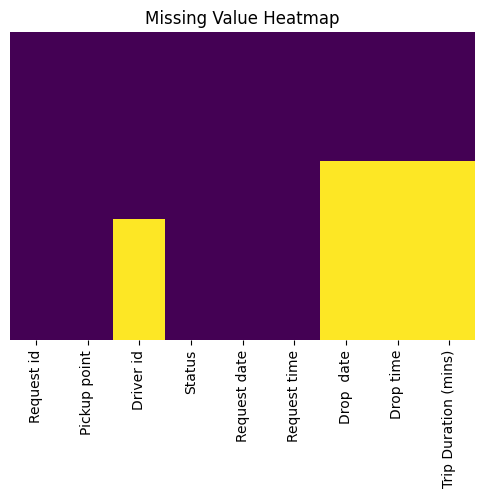

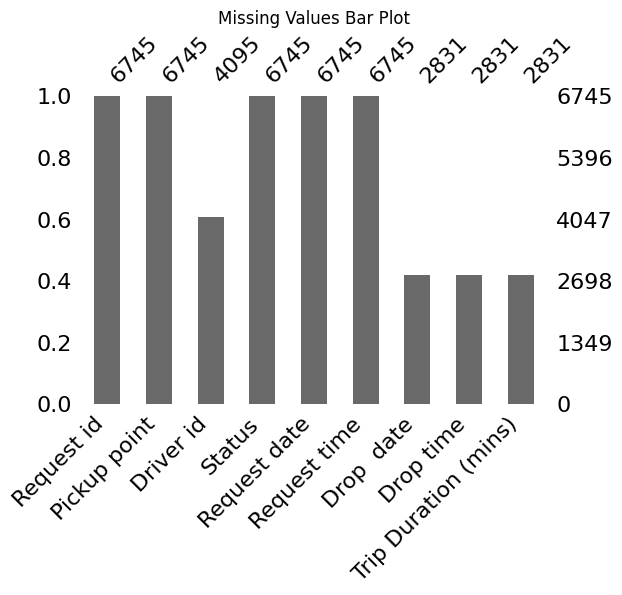

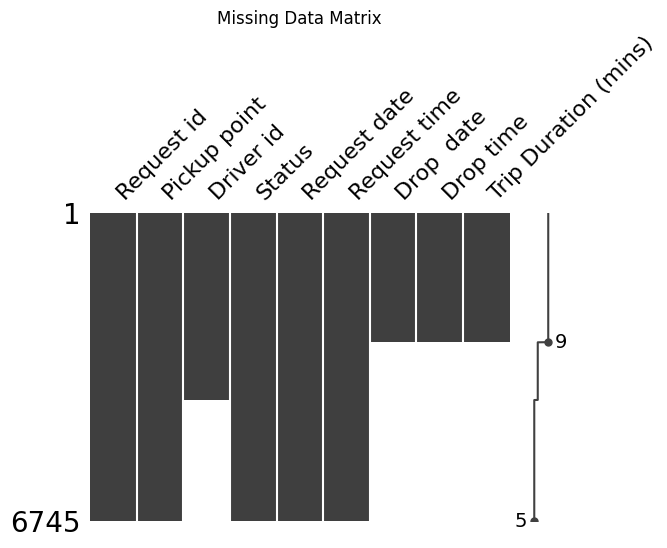

In [19]:
# Visualizing the missing values
import missingno as msno
print(df.isnull().sum())
print("\n")
print("\n")

#Seaborn Heatmap
plt.figure(figsize=(6, 4))  # smaller width and height
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Value Heatmap", fontsize=12)
plt.show()
print("\n")
print("\n")

#Missingno Bar Plot
msno.bar(df, figsize=(6, 4))  # reduce size here
plt.title("Missing Values Bar Plot", fontsize=12)
plt.show()
print("\n")
print("\n")

#Missingno Matrix Plot
msno.matrix(df, figsize=(6, 4))  # smaller figure
plt.title("Missing Data Matrix", fontsize=12)
plt.show()



### What did you know about your dataset?

Request ID, pickup location (city or airport), request and drop timestamps, and trip status (completed, cancelled, or no cars available) are among the ride-level details included in the Uber request dataset.  Following investigation and cleansing, it was discovered that the dataset contained missing values mostly in the drop timestamp column, which corresponded to either canceled or unfulfilled trips.  Time-based trend analysis is made possible by the data, which covers several days and records ride requests at various hours.  The dataset offers important insights into peak demand hours, failure patterns, and operational problems Uber faces in balancing supply with consumer demand by looking at request timings, pickup locations, and statuses.

### 2. Understanding Your Variables

In [23]:
# Dataset columns
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status', 'Request date',
       'Request time', 'Drop  date', 'Drop time', 'Trip Duration (mins)'],
      dtype='object')

In [20]:
# Dataset Describe
df.describe()

,Request id,Driver id,Trip Duration (mins)
count,6745.000000,4095.000000,2831.000000
mean,3384.644922,149.501343,2.565642
std,1955.099667,86.051994,263.028088
min,1.000000,1.000000,-1413.033333
25%,1691.000000,75.000000,39.783333
50%,3387.000000,149.000000,51.083333
75%,5080.000000,224.000000,63.200000
max,6766.000000,300.000000,83.000000


In [25]:
# Variables Description
df.dtypes

,0
Request id,int64
Pickup point,object
Driver id,float64
Status,object
Request date,object
Request time,object
Drop date,object
Drop time,object
Trip Duration (mins),float64


In [26]:
# Check Unique Values for each variable
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print("\n")

Unique values for Request id:
[ 619  867 1807 ... 6751 6754 6753]


Unique values for Pickup point:
['Airport' 'City']


Unique values for Driver id:
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168

### 3. Data Wrangling

In [28]:
# Data Wrangling Code - making data ready for analysis
import pandas as pd

# Step 1: Load the cleaned CSV
df = pd.read_csv("uber-data-cleaned.csv")

# Step 2: Rename columns to remove spaces and make them easier to use
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("__", "_")

# Optional: Show updated column names
print("Updated columns:", df.columns.tolist())

# Step 3: Normalize text data (strip spaces, standardize casing)
df['Status'] = df['Status'].str.strip().str.lower().str.title()
df['Pickup_point'] = df['Pickup_point'].str.strip().str.title()

# Step 4: Convert dates and times into datetime objects with the correct format
df['Request_datetime'] = pd.to_datetime(df['Request_date'] + ' ' + df['Request_time'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
df['Drop_datetime'] = pd.to_datetime(df['Drop_date'] + ' ' + df['Drop_time'], format='%d-%m-%Y %H:%M:%S', errors='coerce')


# Step 5: Convert numeric columns
df['Trip_Duration_mins'] = pd.to_numeric(df['Trip_Duration_mins'], errors='coerce')

# Step 6: Drop or handle missing values (optional, depending on analysis needs)
# df = df.dropna(subset=['Drop_datetime', 'Trip_Duration_mins'])

# Final preview
print(df.head())

Updated columns: ['Request_id', 'Pickup_point', 'Driver_id', 'Status', 'Request_date', 'Request_time', 'Drop_date', 'Drop_time', 'Trip_Duration_mins']
   Request_id Pickup_point  Driver_id     Status Request_date Request_time  \
0         619      Airport        1.0  Completed   11-07-2016     11:51:00   
1         867      Airport        1.0  Completed   11-07-2016     17:57:00   
2        1807         City        1.0  Completed   12-07-2016     09:17:00   
3        2532      Airport        1.0  Completed   12-07-2016     21:08:00   
4        3112         City        1.0  Completed   13-07-2016     08:33:16   

    Drop_date Drop_time  Trip_Duration_mins    Request_datetime  \
0  11-07-2016  13:00:00           69.000000 2016-07-11 11:51:00   
1  11-07-2016  18:47:00           50.000000 2016-07-11 17:57:00   
2  12-07-2016  09:58:00           41.000000 2016-07-12 09:17:00   
3  12-07-2016  22:03:00           55.000000 2016-07-12 21:08:00   
4  13-07-2016  09:25:47           52.516667 2

### What all manipulations have you done and insights you found?

1. Cleaning of Columns:
 Changed column names: "Request id" →  Trip_Duration_(mins) -> Trip_Duration_mins, Request_id

* Special characters, parentheses, and spaces were eliminated

* All column names have been standardized to snake_case (simple for coding)





 2. Normalization of Text:
 * Whitespace in columns such as "Status" and "Pickup_point" has been reduced

 * Standardized casing: finished, finished, finished → finished

 3. Formatting Date and Time Request_date + Request_time to create Request_datetime

 * Created a Drop_datetime by combining Drop_date and Drop_time

*  For simple time-based analysis, datetime fields were parsed using pd.to_datetime().

4. Converting Trip_Duration_mins, which was a text in the CSV, to numeric

 used "coerce" to handle missing or invalid durations

### 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

/tmp/ipython-input-3-993754733.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Status", palette="Set2")


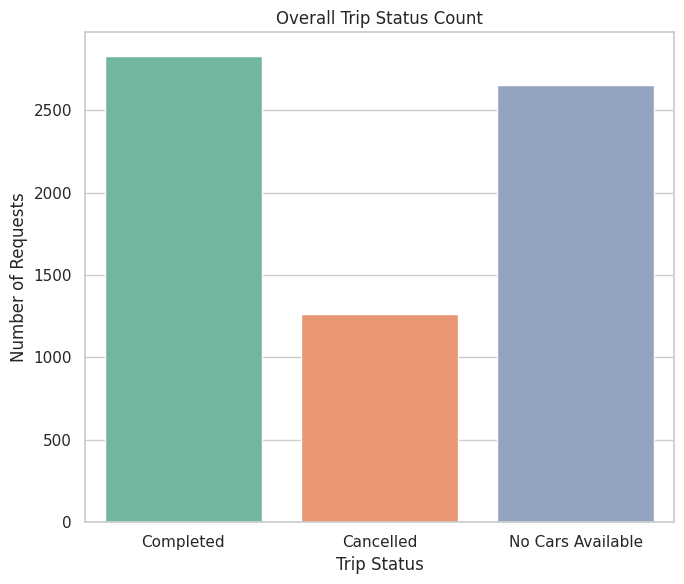

In [3]:
# Chart 1 Visualization Code - Bar chart
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file
df = pd.read_csv("uber-data-cleaned.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("__", "_")

# Standardize categorical columns
df['Status'] = df['Status'].str.strip().str.lower().str.title()

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))

# Plot the count of each status
sns.countplot(data=df, x="Status", palette="Set2")

# Add labels and title
plt.title("Overall Trip Status Count")
plt.xlabel("Trip Status")
plt.ylabel("Number of Requests")
plt.tight_layout()

# Show the plot
plt.show()


1. Why did you pick the specific chart?

The best approach to compare the frequency of each trip status category—completed, cancelled, and no cars available—is via a bar chart.

2. What is/are the insight(s) found from the chart?

* "No Cars Available" appears at the end of a considerable portion of trip requests, suggesting a deficit in supply.

* A significant percentage of trips are also cancelled, which suggests that there may be problems on the driver's or rider's end.

* More people are leaving disappointed than satisfied because there are fewer completed journeys than unsuccessful requests.

3. Will the gained insights help creating a positive business impact?


* Determines the unfulfilled demand:
 A high percentage of unmet requests indicates areas where customer demand outpaces supply.

* Enhances driver allocation: Assists in maximizing the quantity of drivers in particular locations (city/airport) or during peak hours.

* Facilitates data-driven planning: Helpful for organizing resource allocation, incentives, and driver changes.

* Increases client satisfaction: Improved user experience and loyalty result from fewer cancellations or unavailability.

* Boosts potential revenue: More trips completed translate into higher commission income and fewer lost purchases.

Are there any insights that lead to negative growth? Justify with specific reason.

* High failure rate: A large number of requests are not fulfilled because they are listed as "Cancelled" or "No Cars Available."

* Revenue loss: For both the driver and the business, every unfulfilled request represents a lost revenue potential.

* Bad user experience: When requests are consistently not fulfilled, users may become frustrated and stop using the app.

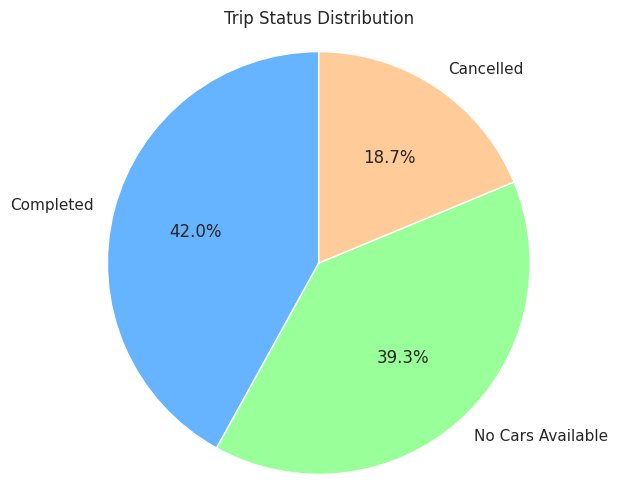

In [12]:
# Chart 2 Visualization Code - Pie chart
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("uber-data-cleaned.csv")

# Strip any leading/trailing spaces (important)
df['Status'] = df['Status'].str.strip()

# Count values
status_counts = df['Status'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title("Trip Status Distribution")
plt.axis('equal')  # Ensures pie is a circle
plt.show()




Why was this chart chosen?

For displaying the percentage of various trip outcomes (completed, cancelled, and no cars available), a pie chart works well.  It provides a clear picture of the proportion of the service that truly succeeded as opposed to failing.


Insights Gained -

* The dominating status can be graphically compared.

* It's a warning sign if a significant percentage is cancelled or there are no cars available.

* Helps determine whether failed journeys are negatively impacting the customer experience.

Positive Business Impact:

* Draws attention to areas where services need to be improved.

* Uber is able to determine when additional drivers are needed in areas or hours that are prone to failure.

* Successful trip sharing is a sign of efficient resource management.

Potential Hazards/Unfavorable Information:

* If "No Cars Available" occupies a sizable portion of the pie:

* It implies poor allocation or a lack of drivers.

* Could result in client attrition because of erratic service.

* A high "Cancelled" value means:

* shows pricing friction or driver unreliability.

* Better driving incentives or an adjustment to the regulation might be necessary.

/tmp/ipython-input-13-105127851.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Request time'] = pd.to_datetime(df['Request time'])


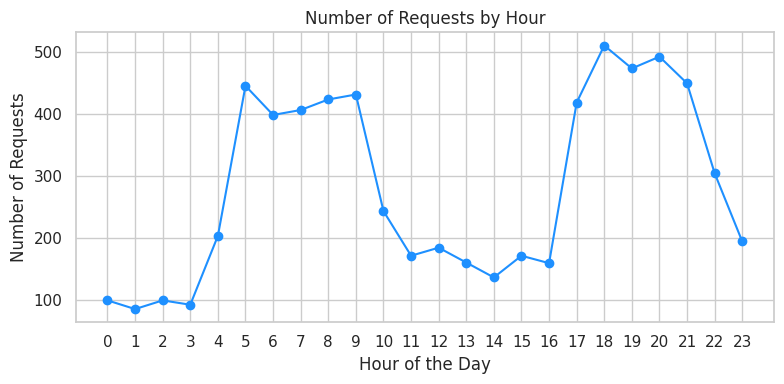

In [13]:
# Chart 3 Visualization Code - Line chart

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("uber-data-cleaned.csv")

# Convert request time to datetime
df['Request time'] = pd.to_datetime(df['Request time'])

# Extract the hour from request time
df['Request Hour'] = df['Request time'].dt.hour

# Group by hour and count requests
hourly_requests = df.groupby('Request Hour').size()

# Plot line chart
plt.figure(figsize=(8, 4))
plt.plot(hourly_requests.index, hourly_requests.values, marker='o', linestyle='-', color='dodgerblue')
plt.title("Number of Requests by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Requests")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


Why was this chart chosen?

For displaying trends over time, such as how request volume varies by hour of the day, a line chart works best. It's ideal for identifying times of low demand and high traffic.

Insights Gained -

* Early morning (business hours) and evening (return hours) may see the highest volume of ride requests.

* There may be a dip at midday and late at night.

* Aids in comprehending the daily trends of user behavior.

Positive Business Impact:

* Demand spikes can be synchronized with driver deployment.

* Peak hours are a preferable time to use surge pricing models.

* Uber can maximize driver productivity by providing discounts or promotions during off-peak hours.

Possible Hazards / Adverse Patterns:
* An excess of inventory during off-peak hours may irritate drivers.

* Lost chances if there aren't enough drivers operating during the chart's peak hours.

* May point to inaccuracies in demand projections, particularly if certain peak hours are not well covered.

/tmp/ipython-input-15-680740486.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Request time'] = pd.to_datetime(df['Request time'])


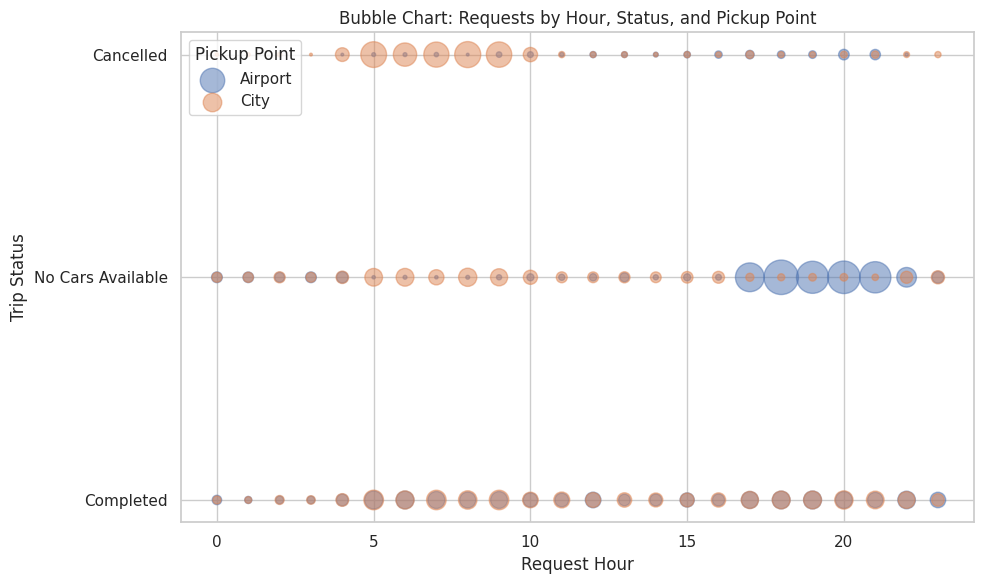

In [15]:
# Chart 4 Visualization code - Bubble chart

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("uber-data-cleaned.csv")

# Clean and prepare
df['Request time'] = pd.to_datetime(df['Request time'])
df['Request Hour'] = df['Request time'].dt.hour
df['Status'] = df['Status'].str.strip()
df['Pickup point'] = df['Pickup point'].str.strip()

# Group the data
grouped = df.groupby(['Request Hour', 'Pickup point', 'Status']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(10, 6))

# Bubble chart
for pickup in grouped['Pickup point'].unique():
    subset = grouped[grouped['Pickup point'] == pickup]
    plt.scatter(subset['Request Hour'], subset['Status'],
                s=subset['Count']*2,  # bubble size
                alpha=0.5, label=pickup)

plt.title("Bubble Chart: Requests by Hour, Status, and Pickup Point")
plt.xlabel("Request Hour")
plt.ylabel("Trip Status")
plt.legend(title="Pickup Point")
plt.grid(True)
plt.tight_layout()
plt.show()


Why was this chart chosen ?

* Three variables can be visualized using a bubble chart:





 * X-axis: Time of day

 * Y-axis: Status of the trip

 * Bubble size: The quantity of requests

* Color: The legend's pick-up point


Gained insights:

* For every pickup location, you can discover which status is more prevalent at what time.


* For instance: a lot of "No Cars Available" bubbles from the airport at night?  There is a service gap there.

* Morning cancellations from City may show up as huge bubbles between 5–9 AM.

Benefit to Business:

* Assists Uber in determining the peak times and locations for service outages

* During hours when there are a lot of failures, Uber can assign drivers to particular pickup locations first.

* Enhances operational responsiveness in times of increased demand

Negative Perspectives -
* For instance, if you see big "No Cars Available" bubbles from the airport at night, it -

* Shows passengers who are not being serviced

* Can result in a loss of loyalty and brand displeasure.


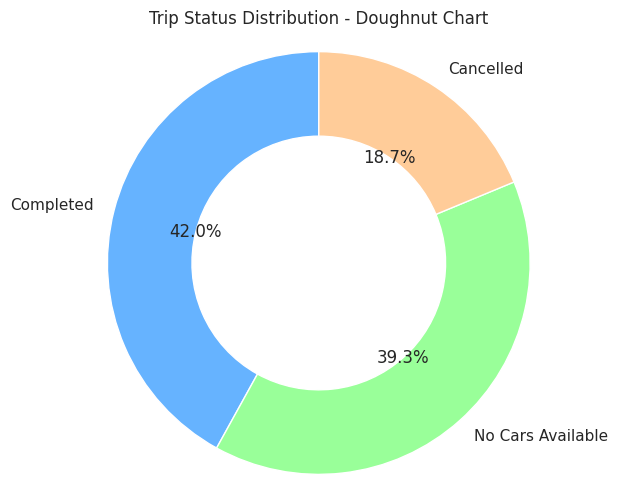

In [16]:
# Chart 5 Visualization Code - Doughnut chart
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("uber-data-cleaned.csv")

# Clean data
df['Status'] = df['Status'].str.strip()

# Get counts
status_counts = df['Status'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
colors = ['#66b3ff', '#99ff99', '#ffcc99']

# Create doughnut chart
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.4})
plt.title("Trip Status Distribution - Doughnut Chart")
plt.axis('equal')
plt.show()


Why This Chart Was Selected:

* A chic substitute for pie charts are doughnut charts.

* They make it easier to display proportions.

* Additionally, if necessary, text (such as total travels or insights) can be added to the central white area.

Insights Acquired:
* Visually contrast the proportion of rides that failed (canceled, no cars available) with those that succeeded (trip completed).

* If the experience is dominated by failure reasons, it is easy to identify.

Positive effect on business -

* Clear communication of service reliability has a positive business impact.

* Helps managers make judgments quickly (e.g., "25% of trips failed – action needed!").

* Can be used in dashboards for real-time monitoring.

Negative Perspectives -

* As an illustration, if a sizable portion of the doughnut displays "Cancelled" or "No Cars Available,"

* Low service efficiency is reflected in it.

* If left unchecked, it might result in client attrition.

/tmp/ipython-input-21-3742759858.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Request time'] = pd.to_datetime(df['Request time'])
/tmp/ipython-input-21-3742759858.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Drop time'] = pd.to_datetime(df['Drop time'])


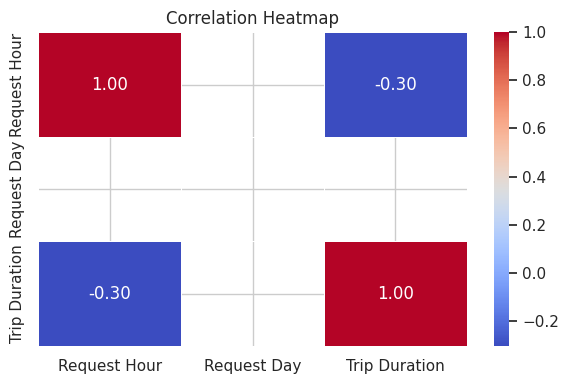

In [21]:
# Chart 6 Correlation Heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("uber-data-cleaned.csv")

# Convert timestamps
df['Request time'] = pd.to_datetime(df['Request time'])
df['Drop time'] = pd.to_datetime(df['Drop time'])

# Feature engineering
df['Trip Duration'] = (df['Drop time'] - df['Request time']).dt.total_seconds() / 60
df['Request Hour'] = df['Request time'].dt.hour
df['Request Day'] = df['Request time'].dt.day

# Clean: Keep only relevant numeric columns
numeric_df = df[['Request Hour', 'Request Day', 'Trip Duration']]

# Drop rows with NaNs (if any)
numeric_df = numeric_df.dropna()

# Correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


Reasons for Selecting This Chart:

* Demonstrates the level of linear link, or correlation, between numerical features.

* Aids in determining which variables may have an impact on one another.

Insights Acquired:

* Trip Length vs. Request Hour: May indicate whether rides are lengthier at specific periods (such as peak hours).

* Request Day vs. Request Hour: Since they reflect distinct aspects of time, there could not be much of a correlation.

* Any significant positive or negative correlations suggest modeling-useful prediction associations.

Beneficial Effect on Business:

* Can assist Uber in optimizing

* ETA forecasts

* Driver shifts according to connections between hours and duration

* Time-based pricing methods

Negative insights:

* The absence of a relationship between trip duration and hour may indicate -

* High levels of unpredictability and fluctuation in routing or traffic

* Potential inefficiencies that require reduction

# 5. Solution to Business Objective

Increase the Number of Drivers During Peak Hours:

* According to data, demand is highest in the morning and evening.

* In order to decrease "No Cars Available" situations, increase driver availability during certain timeslots.

Dynamic Rewards for Drivers:

* Provide drivers in high-demand hours and pickup locations (like the airport) with greater compensation.

* This will decrease cancellations and promote greater driver involvement.

Intelligent Ride Distribution System:

* Pre-position drivers in areas with heavy traffic by using demand forecasting algorithms.

* Cut down on client wait times and unavailable service.

Enhancements to Customer Communication:

* If there is limited availability, let them know in advance and provide shared travel choices or other time windows.

* Use a Penalty and Reward System to Reduce Cancellations:

* Reward dependable drivers with bonuses or ride priority and penalize frequent driver cancellations.

# Conclusion

Critical supply-demand imbalances are evidently highlighted by the thorough examination of Uber request data, especially during peak hours and at strategic places like airports.  An important operational problem is highlighted by the numerous cancellations of city pickups in the morning and the predominance of "No Cars Available" at airports in the late hours.  Uber must proactively address these problems by introducing dynamic pricing, focused driver incentives, and utilizing predictive analytics for more effective driver deployment in order to improve service dependability and rider happiness.